In [1]:
# importa as bibliotecas
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd
import plotly

In [2]:
# mostra a data e o horário inicial do código
tempo_inicial = int(time.time())
inicio_codigo = time.strftime('"%A, %d %B %Y, %H:%M:%S', time.localtime())
print(inicio_codigo)

"Wednesday, 27 October 2021, 20:06:21


In [3]:
# abre o navegador
nav = webdriver.Chrome()

r"""Caso não funcione: 
Baixe a nova versão do chromedriver no site:
https://chromedriver.chromium.org/downloads
Coloque o arquivo na pasta onde está instalado o anaconda. 
Por exemplo:
C:\Users\cesar\anaconda3
Rode o código de novo.
"""

'Caso não funcione: \nBaixe a nova versão do chromedriver no site:\nhttps://chromedriver.chromium.org/downloads\nColoque o arquivo na pasta onde está instalado o anaconda. \nPor exemplo:\nC:\\Users\\cesar\\anaconda3\nRode o código de novo.\n'

In [4]:
# abre o site e espera ele carregar
nav.implicitly_wait(10)
nav.get('http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena')

In [5]:
# pega o número e a data do último concurso
concurso_data_atual = nav.find_element_by_xpath('//*[@id="conteudoresultado"]/div[1]/div/h2/span').text
print(concurso_data_atual)

Concurso 2422 (23/10/2021)


In [6]:
# faz a limpeza dos dados extraindo somente o número do último concurso
concurso_atual = int(concurso_data_atual[concurso_data_atual.find(' ')+1:concurso_data_atual.rfind(' ')])
print(concurso_atual)

2422


In [7]:
# faz a limpeza dos dados extraindo somente a data do último concurso
data_atual = concurso_data_atual[concurso_data_atual.find('(')+1:concurso_data_atual.rfind(')')]
print(data_atual)

23/10/2021


In [8]:
# pega quais foram os números sorteados no último concurso
numeros_sorteio = nav.find_element_by_xpath('//*[@id="ulDezenas"]').text
print(numeros_sorteio)

020710203046


In [9]:
# pega a quantidade de ganhadores e o valor do prêmio
ganhador_premio = nav.find_element_by_xpath('//*[@id="conteudoresultado"]/div[3]/div/p[1]/span[2]').text
print(ganhador_premio)

In [10]:
# faz a limpeza dos dados extraindo somente a quantidade de ganhadores
if len(ganhador_premio) > 1:
    quantidade_ganhadores = int(ganhador_premio[:ganhador_premio.find(' ')])
    print(quantidade_ganhadores)
else:
    quantidade_ganhadores = 0
    print(quantidade_ganhadores)

0


In [11]:
# faz a limpeza dos dados extraindo somente o valor do prêmio
if len(ganhador_premio) > 1:
    premio = ganhador_premio[ganhador_premio.rfind(' ')+1:]
    print(premio)
else:
    premio = '0'
    print(premio)

0


In [12]:
# cria o DataFrame
df = pd.DataFrame([], index=range(1, concurso_atual+1), columns = ['Concurso', 'Data', 'N_Sorteados', 'Q_Ganhadores', 'Premio'])
print(df)

     Concurso Data N_Sorteados Q_Ganhadores Premio
1         NaN  NaN         NaN          NaN    NaN
2         NaN  NaN         NaN          NaN    NaN
3         NaN  NaN         NaN          NaN    NaN
4         NaN  NaN         NaN          NaN    NaN
5         NaN  NaN         NaN          NaN    NaN
...       ...  ...         ...          ...    ...
2418      NaN  NaN         NaN          NaN    NaN
2419      NaN  NaN         NaN          NaN    NaN
2420      NaN  NaN         NaN          NaN    NaN
2421      NaN  NaN         NaN          NaN    NaN
2422      NaN  NaN         NaN          NaN    NaN

[2422 rows x 5 columns]


In [13]:
# insere os dados no DataFrame
df.loc[concurso_atual]=[concurso_atual, data_atual, numeros_sorteio, quantidade_ganhadores, premio]
print(df)

     Concurso        Data   N_Sorteados Q_Ganhadores Premio
1         NaN         NaN           NaN          NaN    NaN
2         NaN         NaN           NaN          NaN    NaN
3         NaN         NaN           NaN          NaN    NaN
4         NaN         NaN           NaN          NaN    NaN
5         NaN         NaN           NaN          NaN    NaN
...       ...         ...           ...          ...    ...
2418      NaN         NaN           NaN          NaN    NaN
2419      NaN         NaN           NaN          NaN    NaN
2420      NaN         NaN           NaN          NaN    NaN
2421      NaN         NaN           NaN          NaN    NaN
2422     2422  23/10/2021  020710203046            0      0

[2422 rows x 5 columns]


In [14]:
# cria variavel para contagem regressiva
proximo_concurso = concurso_atual
print(proximo_concurso)

2422


In [17]:
# faz o looping até pegar todos os dados
while proximo_concurso > 1:
    proximo_concurso -= 1
    texto_proximo_concurso = str(proximo_concurso)

    nav.find_element_by_xpath('//*[@id="buscaConcurso"]').clear()
    nav.find_element_by_xpath('//*[@id="buscaConcurso"]').send_keys(proximo_concurso)
    nav.find_element_by_xpath('//*[@id="buscaConcurso"]').send_keys(Keys.ENTER)

    esperar = WebDriverWait(nav, 10).until(
        EC.text_to_be_present_in_element((By.XPATH, '//*[@id="conteudoresultado"]/div[1]/div/h2/span'), texto_proximo_concurso)
    )

    concurso_data_anterior = nav.find_element_by_xpath('//*[@id="conteudoresultado"]/div[1]/div/h2/span').text

    concurso_anterior = int(concurso_data_anterior[concurso_data_anterior.find(' ')+1:concurso_data_anterior.rfind(' ')])

    if concurso_anterior == proximo_concurso:

        data_anterior = concurso_data_anterior[concurso_data_anterior.find('(')+1:concurso_data_anterior.rfind(')')]

        numeros_sorteio_anterior = nav.find_element_by_xpath('//*[@id="ulDezenas"]').text

        ganhador_premio_anterior = nav.find_element_by_xpath('//*[@id="conteudoresultado"]/div[3]/div/p[1]/span[2]').text

        if len(ganhador_premio_anterior) > 1:
            quantidade_ganhadores_anterior = int(ganhador_premio_anterior[:ganhador_premio_anterior.find(' ')])
        else:
            quantidade_ganhadores_anterior = 0

        if len(ganhador_premio_anterior) > 1:
            premio_anterior = ganhador_premio_anterior[ganhador_premio_anterior.rfind(' ')+1:]
        else:
            premio_anterior = '0'

        df.loc[concurso_anterior] = [concurso_anterior, data_anterior, numeros_sorteio_anterior, quantidade_ganhadores_anterior, premio_anterior]

    else:
        proximo_concurso += 1

print("Loop executado com sucesso!")

Loop executado com sucesso!


In [18]:
# mostra o resultado final do looping com todos os resultados
print(df)

     Concurso        Data   N_Sorteados Q_Ganhadores         Premio
1           1  11/03/1996  040530334152            0              0
2           2  18/03/1996  093739414349            1   2.307.162,23
3           3  25/03/1996  101129303647            0              0
4           4  01/04/1996  010506274259            0              0
5           5  08/04/1996  010206161946            0              0
...       ...         ...           ...          ...            ...
2418     2418  13/10/2021  021119275760            0              0
2419     2419  16/10/2021  103543485053            1  11.509.541,30
2420     2420  19/10/2021  050829394460            0              0
2421     2421  21/10/2021  020332354857            0              0
2422     2422  23/10/2021  020710203046            0              0

[2422 rows x 5 columns]


In [19]:
# mostra algumas linhas aleatorias para verificar o resultado
df.sample(10)

,Concurso,Data,N_Sorteados,Q_Ganhadores,Premio
961,961,16/04/2008,020416213653,0,0
1863,1863,05/10/2016,162345565859,0,0
696,696,03/09/2005,091634375357,0,0
2026,2026,28/03/2018,102331335152,0,0
2352,2352,13/03/2021,091738414955,0,0
2179,2179,14/08/2019,021324355054,0,0
1446,1446,28/11/2012,061324324051,1,"2.639.040,77"
1212,1212,08/09/2010,022333354050,0,0
534,534,31/01/2004,030823314857,1,"15.184.658,12"
974,974,31/05/2008,121620313845,0,0


In [20]:
# separa os números sorteados
df = df.assign(N1 = df["N_Sorteados"].str[0:2],
               N2 = df["N_Sorteados"].str[2:4],
               N3 = df["N_Sorteados"].str[4:6],
               N4 = df["N_Sorteados"].str[6:8],
               N5 = df["N_Sorteados"].str[8:10],
               N6 = df["N_Sorteados"].str[10:12]
              )
print(df)

     Concurso        Data   N_Sorteados Q_Ganhadores         Premio  N1  N2  \
1           1  11/03/1996  040530334152            0              0  04  05   
2           2  18/03/1996  093739414349            1   2.307.162,23  09  37   
3           3  25/03/1996  101129303647            0              0  10  11   
4           4  01/04/1996  010506274259            0              0  01  05   
5           5  08/04/1996  010206161946            0              0  01  02   
...       ...         ...           ...          ...            ...  ..  ..   
2418     2418  13/10/2021  021119275760            0              0  02  11   
2419     2419  16/10/2021  103543485053            1  11.509.541,30  10  35   
2420     2420  19/10/2021  050829394460            0              0  05  08   
2421     2421  21/10/2021  020332354857            0              0  02  03   
2422     2422  23/10/2021  020710203046            0              0  02  07   

      N3  N4  N5  N6  
1     30  33  41  52  
2    

In [21]:
# cria um DataFrame para cada coluna dos números sorteados
df1 = pd.DataFrame(df['N1'])
df2 = pd.DataFrame(df['N2'])
df3 = pd.DataFrame(df['N3'])
df4 = pd.DataFrame(df['N4'])
df5 = pd.DataFrame(df['N5'])
df6 = pd.DataFrame(df['N6'])

In [22]:
# renomeia as colunas dos números sorteados
df1 = df1.rename(columns={'N1': 'N'})
df2 = df2.rename(columns={'N2': 'N'})
df3 = df3.rename(columns={'N3': 'N'})
df4 = df4.rename(columns={'N4': 'N'})
df5 = df5.rename(columns={'N5': 'N'})
df6 = df6.rename(columns={'N6': 'N'})

In [23]:
# junta todos os números sorteados em um único DataFrame
freq_df = pd.concat([df1, df2, df3, df4, df5, df6])
print(freq_df)

       N
1     04
2     09
3     10
4     01
5     01
...   ..
2418  60
2419  53
2420  60
2421  57
2422  46

[14532 rows x 1 columns]


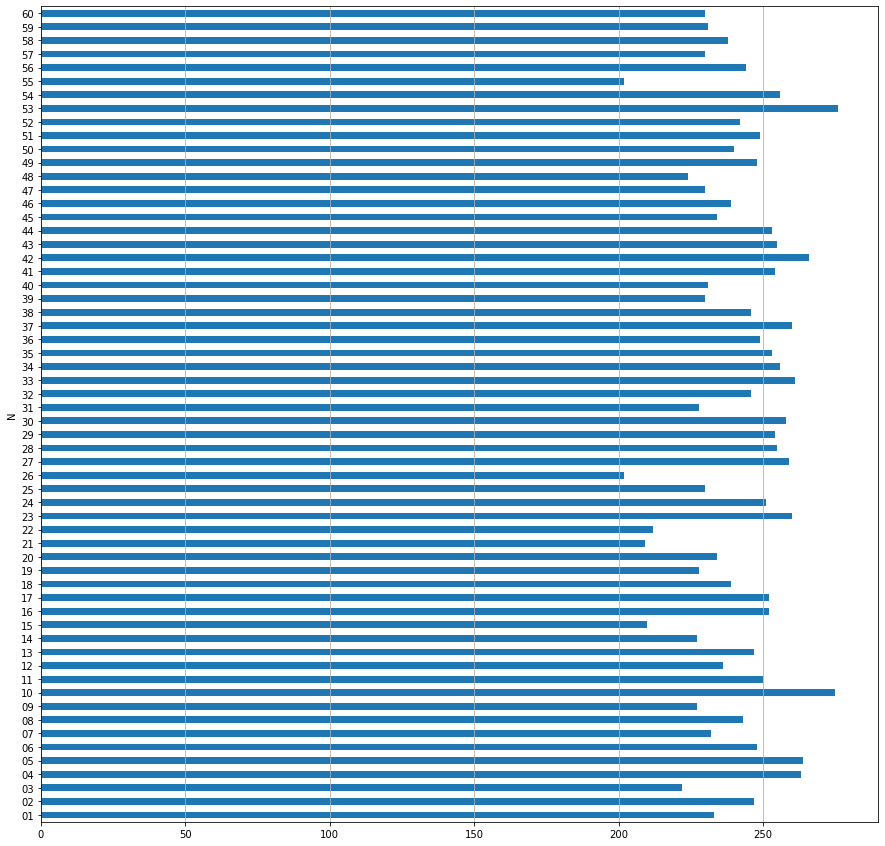

In [24]:
# cria o gráfico de quantas vezes cada número já foi sorteado
freq_df.groupby(['N']).size().plot(kind = 'barh', figsize = (15, 15)).xaxis.grid(True)

In [28]:
# salva o DataFrame em um arquivo de excel
df.to_excel("Todos_Os_Resultados_Da_Mega_Sena.xlsx")

In [31]:
# fecha o navegador
nav.quit()

KeyboardInterrupt: 

In [32]:
# mostra a data e o horário final do código
tempo_final = int(time.time())
diferenca_de_tempo = int(tempo_final - tempo_inicial)
tempo_total_de_execucao = time.strftime('%H:%M:%S', time.gmtime(diferenca_de_tempo))
fim_codigo = time.strftime('"%A, %d %B %Y, %H:%M:%S', time.localtime())

print(inicio_codigo)
print(fim_codigo)
print(f'O codigo demorou no total:  {tempo_total_de_execucao}')

"Wednesday, 27 October 2021, 20:06:21
"Wednesday, 27 October 2021, 20:47:09
O codigo demorou no total:  00:40:48
